Load Libraries

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

Load Data Frame

In [43]:

df = pd.read_csv("assets/SamplespotifyData.csv", encoding='latin-1')

df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [44]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
liked                 int64
dtype: object

Produce Graphs

/tmp/ipykernel_25744/2712589167.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barGraph.set_xticklabels(barGraph.get_xticklabels(),


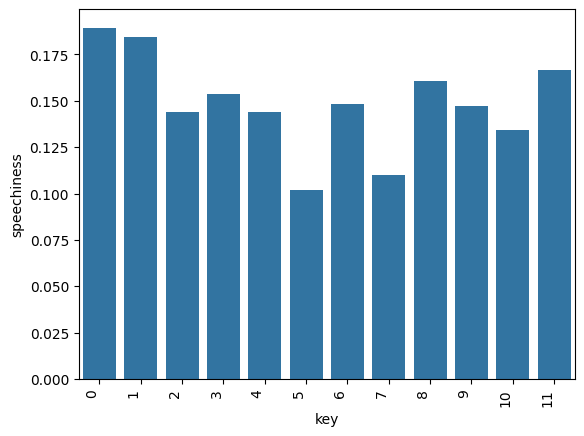

In [45]:
#BAR GRAPH

barGraph = sns.barplot(x="key", y="speechiness",data=df,errorbar = ['ci',0])

barGraph.set_xticklabels(barGraph.get_xticklabels(),
rotation=90,ha='right')

plt.show()

/tmp/ipykernel_25744/653288813.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  histGraph.set_xticklabels(histGraph.get_xticklabels(),


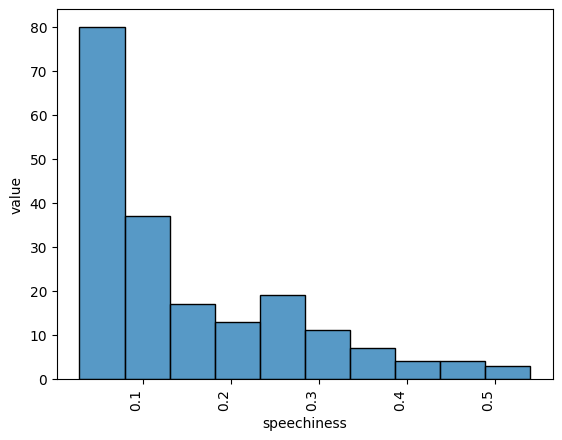

In [46]:
import math

histGraph = sns.histplot(x="speechiness",data=df,binwidth=0.05)

histGraph.set_xticklabels(histGraph.get_xticklabels(),
rotation=90,ha='right')
plt.ylabel("value")
plt.xlabel("speechiness")

plt.show()

Correlation Graphs

0.6271348175676059


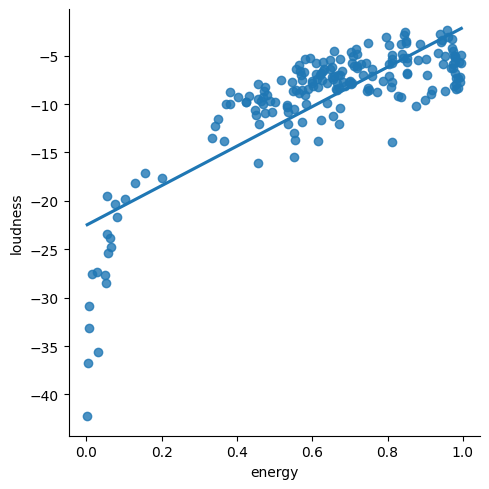

In [51]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['energy', 'loudness']])
x = scaled_data[:, 0]
y = scaled_data[:, 1]

r2 = r2_score(x,y) 

print(r2)

ax = sns.lmplot(x='energy', y='loudness', data=df, ci=None)

#l for lion, m for moose
plt.show()

<Axes: title={'center': 'Pearson Correlation of Features'}>

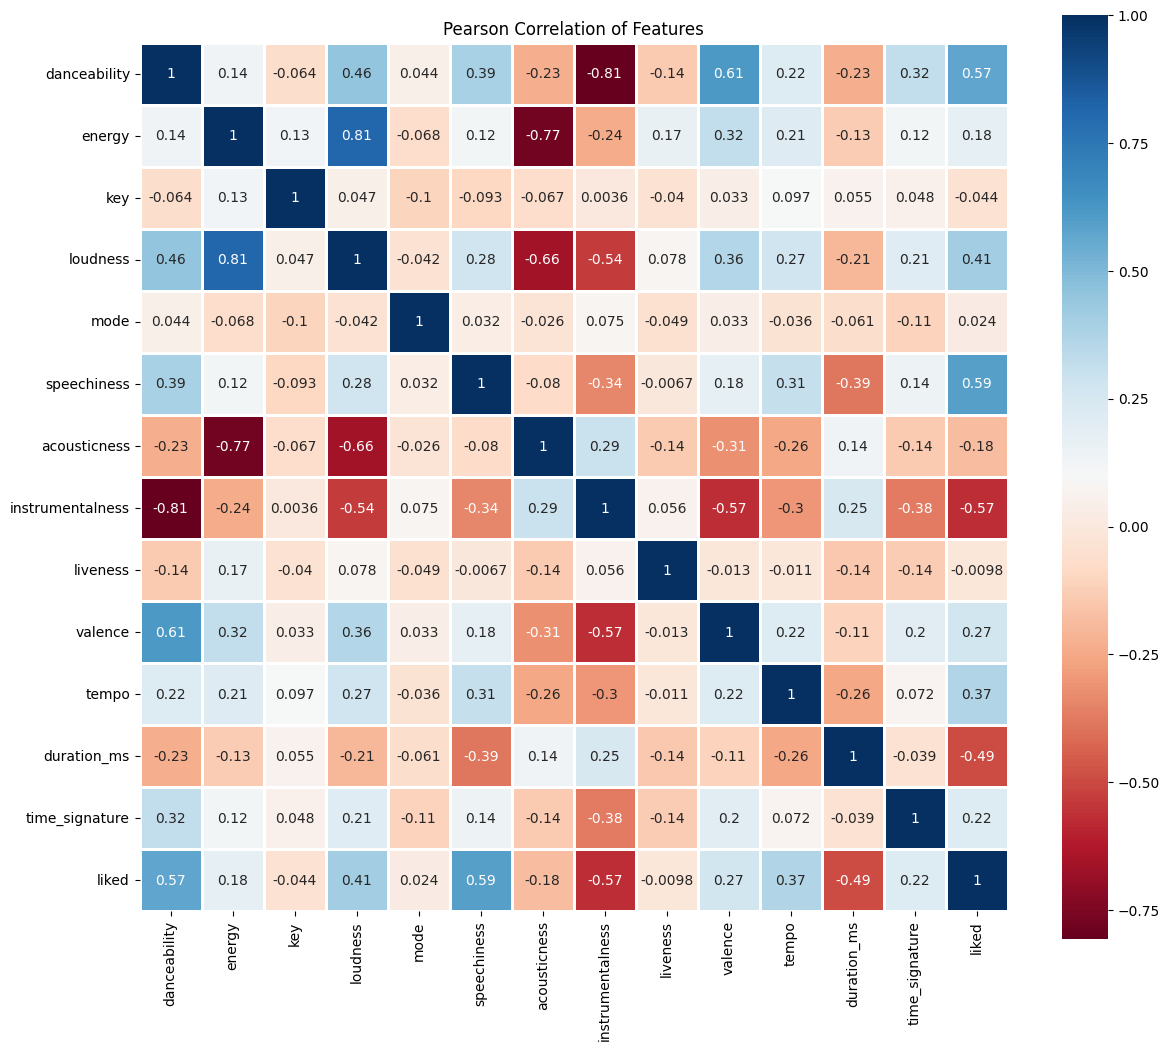

In [52]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features')
sns.heatmap(df.corr(), linewidths=1,
           square=True, cmap='RdBu', linecolor='white', annot=True)